# I. Construction d'un Indicateur de pauvreté Multidimensionnel

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import scipy.stats # pour les stats descp 
import numpy as np # pour les calculs numériques, algébriques, etc. 
import pylab # un melange de 
import pandas as pd # pour les data frames
import seaborn as sns # pour les graphiques 
import statistics # stats
import statsmodels.api as smi # modeles de regression
from fanalysis.mca import MCA
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.impute import KNNImputer


In [4]:
df = pd.read_csv('indicateurs_synthetiques2.csv')

# Pre Porcessing

In [5]:
df.head()

,Unnamed: 0,ID_CM,Region,Sexe,Age_CM,Niveau_educ,Privation_eau,Privation_electricite,Privation_communication,Handicap_visuel,...,Combustible_cuisson,Assainissement,Eau,Electricite,Sol,Biens,Logement,Acces_eau_e10,Toilettes_e08a,Toilettes_e08b
0,0,d65862c2b2c34aefb070a708718426b3,LOUGA,2,43,4,1,1,1,0,...,3,12,4,7,7,29,6,31,12,1
1,1,5757c99a52d73d9b3e563a0046add2ee,KAFFRINE,1,75,0,1,1,0,0,...,1,11,11,4,7,31,2,42,11,1
2,2,ed36b9182948943432386fa422a084b1,SEDHIOU,1,72,0,1,0,0,0,...,3,31,10,5,6,15,1,42,41,1
3,3,bdc6d7893af482720b45eb6258f07fd3,FATICK,2,67,3,1,1,1,1,...,2,51,10,7,5,27,7,81,41,0
4,4,fe090e5a588ca62bdbff8e807d04e475,KAFFRINE,1,18,1,0,1,1,0,...,4,23,8,9,10,24,8,13,41,0


In [4]:
df.shape

(1000, 48)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID_CM', 'Region', 'Sexe', 'Age_CM', 'Niveau_educ',
       'Privation_eau', 'Privation_electricite', 'Privation_communication',
       'Handicap_visuel', 'Hnadicap_auditif', 'Handicap_moteur',
       'Alphabetisation_CM', 'Frequentation_scolaire_CM',
       'Formation_professionnelle_CM', 'Mais', 'Riz', 'Sorgho', 'Fonio', 'Mil',
       'Aubergine_amere', 'Aubergine_douce', 'Chou', 'Gombo', 'Piment',
       'Carotte', 'Navet', 'Concombre', 'Laitue_salade', 'Culture_pluviale',
       'Elevage', 'Culture_maraichere', 'Arboriculture_fruitiere',
       'Peche_aquaculture', 'Annees_etudes',
       'Frequentation_scolaire_des_enfants', 'Subsistance', 'Malade',
       'Combustible_cuisson', 'Assainissement', 'Eau', 'Electricite', 'Sol',
       'Biens', 'Logement', 'Acces_eau_e10', 'Toilettes_e08a',
       'Toilettes_e08b'],
      dtype='object')

In [6]:
Na = 100*df.isnull().sum()/len(df)
Na.sum() #Pas de valeurs manquantes

0.0

# Recodage de l'âge en classe 

In [6]:
bins = [18, 35, 60, 100]  # Bornes des intervalles
labels = ['1', '2', '3']  # Labels correspondants
df['age_class'] = pd.cut(df['Age_CM'], bins=bins, labels=labels, right=False)

In [7]:
df['age_class'] = df['age_class'].astype(int)

# Construction des indicateurs à partir des seuils 

In [8]:
df.columns

Index(['Unnamed: 0', 'ID_CM', 'Region', 'Sexe', 'Age_CM', 'Niveau_educ',
       'Privation_eau', 'Privation_electricite', 'Privation_communication',
       'Handicap_visuel', 'Hnadicap_auditif', 'Handicap_moteur',
       'Alphabetisation_CM', 'Frequentation_scolaire_CM',
       'Formation_professionnelle_CM', 'Mais', 'Riz', 'Sorgho', 'Fonio', 'Mil',
       'Aubergine_amere', 'Aubergine_douce', 'Chou', 'Gombo', 'Piment',
       'Carotte', 'Navet', 'Concombre', 'Laitue_salade', 'Culture_pluviale',
       'Elevage', 'Culture_maraichere', 'Arboriculture_fruitiere',
       'Peche_aquaculture', 'Annees_etudes',
       'Frequentation_scolaire_des_enfants', 'Subsistance', 'Malade',
       'Combustible_cuisson', 'Assainissement', 'Eau', 'Electricite', 'Sol',
       'Biens', 'Logement', 'Acces_eau_e10', 'Toilettes_e08a',
       'Toilettes_e08b', 'age_class'],
      dtype='object')

In [9]:
df['Assainissement'].value_counts()

Assainissement
31    148
22    134
41    132
12    126
23    124
11    118
51    110
21    108
Name: count, dtype: int64

In [10]:
df['annee_etude'] = (df['Annees_etudes']<=8).astype(int)
df['frequentation_scolaire'] = (df['Frequentation_scolaire_des_enfants'] == 0).astype(int)
df['subsistance'] = (df['Subsistance']==1).astype(int)
df['malade'] = (df['Malade']==1).astype(int)
df['combustible_cuisson'] = ((df['Combustible_cuisson']==1) & (df['Combustible_cuisson']==2)).astype(int)
df['assainissement'] = ((df['Assainissement']>=22) & (df['Assainissement']<= 51)).astype(int)
df['electricite'] = ((df['Electricite']<=9) & (df['Electricite']>=5)).astype(int)
df['eau'] = ((df['Eau']==4) & (df['Eau']==7) & (df['Eau']==10) & (df['Eau']==11)).astype(int)
df['sol'] = ((df['Sol']>=7) & (df['Sol'] <=11)).astype(int)
df['biens'] = (df['Biens']<=2).astype(int)

In [11]:
df['annee_etude_i']             =df['annee_etude']*(1/6)     
df['frequentation_scolaire_i']  =df['frequentation_scolaire']*(1/6)
df['subsistance_i']             =df['subsistance']*(1/6)         
df['malade_i']                  =df['malade']*(1/6)             
df['combustible_cuisson_i']     =df['combustible_cuisson']*(1/18)  
df['assainissement_i']          =df['assainissement']*(1/18)   
df['electricite_i']             =df['electricite']*(1/18)        
df['eau_i']                     =df['eau']*(1/18)                
df['sol_i']                     =df['sol']*(1/18)                  
df['biens_i']                   =df['biens']*(1/18)               

In [12]:
df['score_poor'] = df[['annee_etude_i', 'frequentation_scolaire_i', 'subsistance_i', 'malade_i', 'combustible_cuisson_i', 'assainissement_i', 'electricite_i', 'eau_i', 'sol_i', 'biens_i']].sum(axis=1)

In [13]:
df['score_poor'].head()

0    0.277778
1    0.388889
2    0.611111
3    0.444444
4    0.333333
Name: score_poor, dtype: float64

In [14]:
k = 0.33
df['poor'] = (df[['score_poor']]>=k).astype(int)
df['poor'].head()

0    0
1    1
2    1
3    1
4    1
Name: poor, dtype: int32

In [15]:
d = 10  # nombre d'indicateurs
H   = df['poor'].mean()
A   = df.loc[df['poor'] == 1, 'score_poor'].mean()
MPI = H * A

In [16]:
print(f"Taux de pauvreté multidimensionnel: {H}")
print(f"Intensité moyenne de la pauvreté (A): {A}")
print(f"Indicateur de pauvreté multidimensionnelle (MPI): {MPI}")

Taux de pauvreté multidimensionnel: 0.61
Intensité moyenne de la pauvreté (A): 0.4805100182149363
Indicateur de pauvreté multidimensionnelle (MPI): 0.2931111111111111


In [17]:
results_df = pd.DataFrame({
    'Indicateur': ['Taux de pauvreté multidimensionnel (H)', 'Intensité moyenne de la pauvreté (A)', 'Indicateur de pauvreté multidimensionnelle (MPI)'],
    'Valeur': [H, A, MPI]
})

# Exporter le DataFrame en fichier Excel
results_df.to_excel('resultats_pauvrete.xlsx', index=False)

# Désagrégation de l'indicateur 

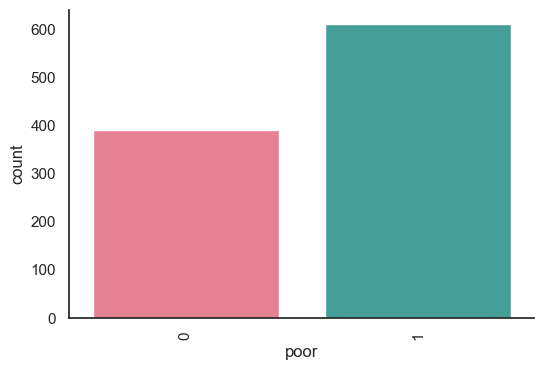

In [18]:
# palette
palette = sns.color_palette("husl", 2)

# theme et palette
sns.set_theme(style="white")
sns.set_palette(palette)

# graphique
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='poor', palette=palette)

# abscisses verticalement
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Enlever les lignes de côté du graphique
sns.despine(top=True, right=True, left=False)

# Afficher le graphique
plt.show()

# Paureté en fonction des régions

In [19]:
pd.crosstab(df.Region, df.poor, margins = True, normalize="index")*100

poor,0,1
Region,,
DAKAR,47.297297,52.702703
DIOURBEL,39.344262,60.655738
FATICK,37.681159,62.318841
KAFFRINE,43.589744,56.410256
KAOLACK,40.298507,59.701493
KEDOUGOU,35.937500,64.062500
KOLDA,34.210526,65.789474
LOUGA,25.675676,74.324324
MATAM,32.894737,67.105263


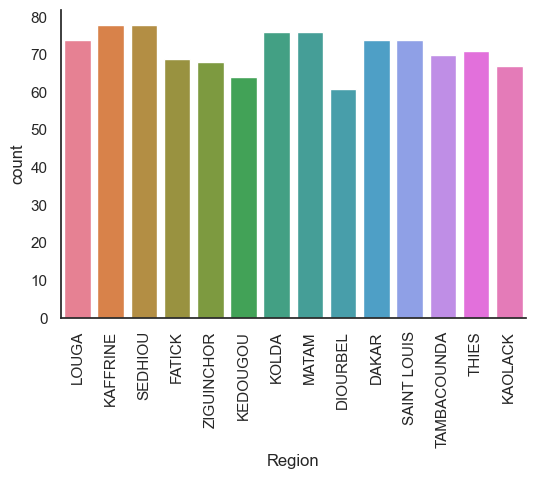

In [20]:
# palette
palette = sns.color_palette("husl", 14)

# theme et palette
sns.set_theme(style="white")
sns.set_palette(palette)

# graphique
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Region', palette=palette)

# abscisses verticalement
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Enlever les lignes de côté du graphique
sns.despine(top=True, right=True, left=False)

# Afficher le graphique
plt.show()


# Pauvreté et sexe du chef de ménage 

In [21]:
pd.crosstab(df.Sexe, df.poor, margins = True, normalize="index")*100

poor,0,1
Sexe,,
1,35.892116,64.107884
2,41.891892,58.108108
All,39.000000,61.000000


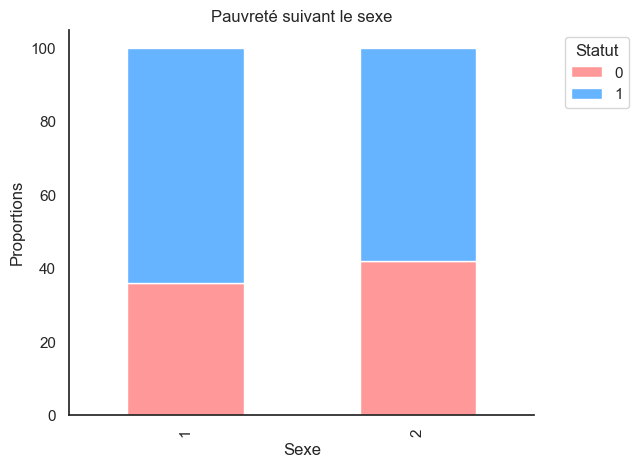

In [22]:

t = pd.crosstab(df.Sexe, df.poor, normalize='index') * 100
#palette 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76D7C4','#F7DC6F','#85C1E9']

# graphique 
ax = t.plot.bar(stacked=True, color=colors, figsize=(6, 5))

# étiquettes
ax.set_title('Pauvreté suivant le sexe')
ax.set_ylabel('Proportions')
ax.set_xlabel('Sexe')

# Enlever les lignes de côté du graphique
sns.despine(top=True, right=True, left=False)

# Afficher la légende en dehors du graphique
plt.legend(title='Statut', bbox_to_anchor=(1.05, 1), loc='upper left')

# Pauvreté en fonction de l'âge du chef de ménage 

In [23]:
pd.crosstab(df.age_class, df.poor, margins = True, normalize="index")*100

poor,0,1
age_class,,
1,38.114754,61.885246
2,40.547945,59.452055
3,38.107417,61.892583
All,39.000000,61.000000


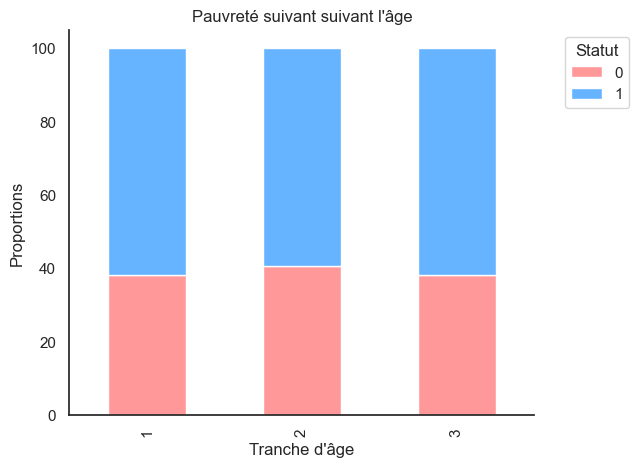

In [24]:

t = pd.crosstab(df.age_class, df.poor, normalize='index') * 100
#palette 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f','#76D7C4','#F7DC6F','#85C1E9']

# graphique 
ax = t.plot.bar(stacked=True, color=colors, figsize=(6, 5))

# étiquettes
ax.set_title("Pauvreté suivant suivant l'âge")
ax.set_ylabel('Proportions')
ax.set_xlabel("Tranche d'âge")

# Enlever les lignes de côté du graphique
sns.despine(top=True, right=True, left=False)

# Afficher la légende en dehors du graphique
plt.legend(title='Statut', bbox_to_anchor=(1.05, 1), loc='upper left')

# II. Indicateur composite de la pauvreté 

La construction de l'ICP non monétaire pour chaque unité de la population sera effectuée à l'aide des techniques d'analyses multidimensionnelles. Parmi lesquelles l'ACM qui est la plus adaptée car toutes les variables sont qualitatives. La forme fonctionnelle de l'ICP est selon Louis-Marie Asselin (2002) :

$$I_{i,t}= \left( \sum_{k=1}^{K} \sum_{j_k=1}^{J_k} W_{j_k}^k I_{j_k}^k \right)/K$$


Après avoir obtenu $I_{i,t}$ on le normalise car il peut contenir des valeurs négatives et aussi on le fait pour qu'il soit compris entre 0 et 1 

C'est-à-dire : 

$$I_{i,t}^{'} = \frac{I_{i,t} - I_{min}}{I_{max}-I_{min}}$$

Ainsi, la forme fonctionnelle de Minvielle et Bri (2003) est adoptée pour calculer l'indice SPI. Pour l'individu i, l'indice SPIi est : 

$$I_i = \sum_{t=1}^P \frac{\lambda_t}{\sum_{t=1}^P \lambda_t} I_{i,t}^{'}$$

In [25]:
# ACM 
import scientisttools 
from prince import MCA

df['Sexe'] = df['Sexe'].replace({1: 'homme', 2: 'femme'})

df2 = df[['Sexe', 'age_class', 'annee_etude', 'frequentation_scolaire', 'subsistance', 'malade', 'combustible_cuisson', 'assainissement', 'electricite', 'eau', 'sol', 'biens']]
df2 = df2.astype(object)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Sexe                    1000 non-null   object
 1   age_class               1000 non-null   object
 2   annee_etude             1000 non-null   object
 3   frequentation_scolaire  1000 non-null   object
 4   subsistance             1000 non-null   object
 5   malade                  1000 non-null   object
 6   combustible_cuisson     1000 non-null   object
 7   assainissement          1000 non-null   object
 8   electricite             1000 non-null   object
 9   eau                     1000 non-null   object
 10  sol                     1000 non-null   object
 11  biens                   1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [26]:
from scientisttools import MCA 
res_mca = MCA(n_components=5, quali_sup = [0], parallelize=False)
res_mca.fit(df2)

MCA(n_components=5, quali_sup=[0])

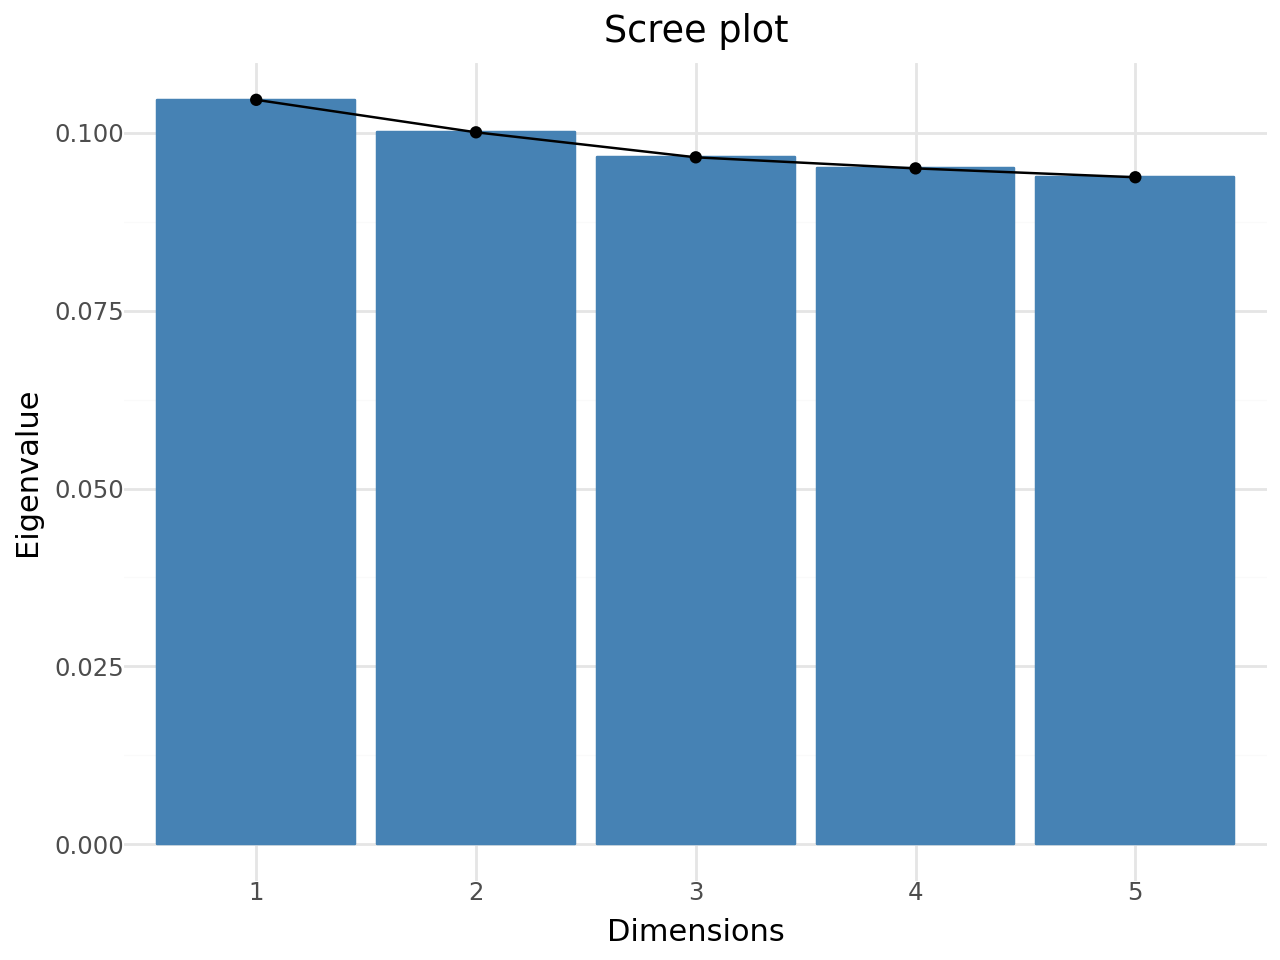

In [27]:
# Valeurs propres 
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mca,choice="eigenvalue")
print(p)

In [28]:
# Correction de Benzecri 
correction = pd.DataFrame(res_mca.benzecri_correction_) 
correction  # Le premier axe et le deuxième expliquent près 82% de l'information

,eigenvalue,proportion,cumulative
Dim.1,2.285393e-04,57.223338,57.223338
Dim.2,1.018491e-04,25.501730,82.725067
Dim.3,3.874211e-05,9.700533,92.425600
Dim.4,2.037015e-05,5.100428,97.526028
Dim.5,9.872746e-06,2.472010,99.998039
Dim.6,7.833440e-09,0.001961,100.000000


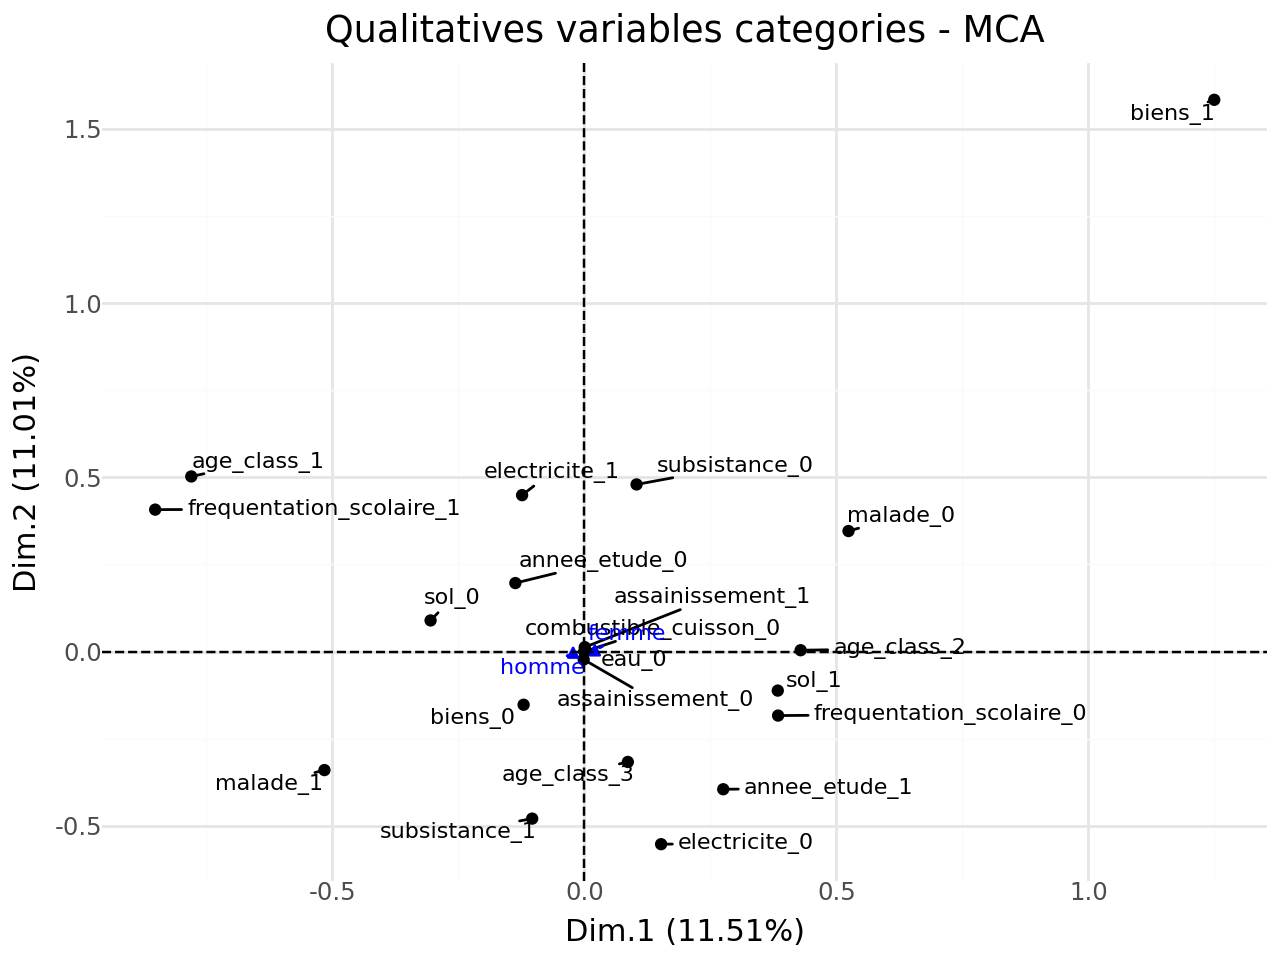

In [29]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(res_mca,repel=True)
print(p)
# Opposition suivant l'axe 1 des ménages privés de certains indicateurs contre ceux non privés. Ainsi, l'axe 1 représente bien la phénomène de pauvreté
# Les hommes sont plus proche de l'axe des non pauvres que les femmes

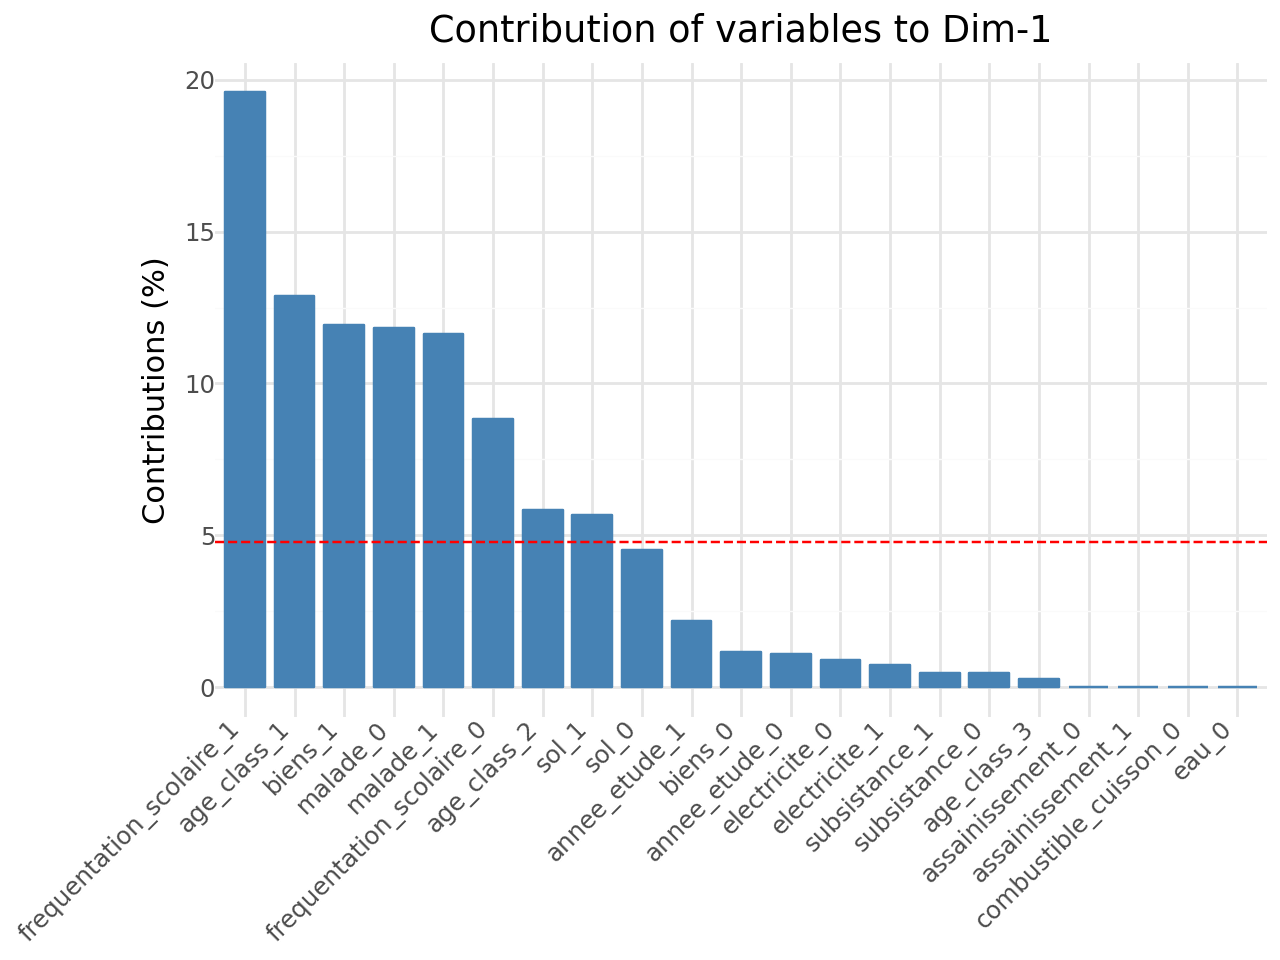

In [30]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mca,choice="var")
print(p) 
# Sur les 10 indicateurs I_k on voit que 3 contribuent faiblement à la formation du premier axe : malade, âge et combustible

# On supprime les variables qui contribuent faiblement et on refait l'ACM

In [31]:
# On supprime les variables qui contribuent faiblement 
df3 = df2.drop(['age_class', 'malade', 'combustible_cuisson', 'eau'], axis=1)


# on refait l'ACM 
res_mca2 = MCA(n_components=5, quali_sup = [0], parallelize=False)
res_mca2.fit(df3)

MCA(n_components=5, quali_sup=[0])

In [32]:
# Correction de Benzecri 
correction2 = pd.DataFrame(res_mca2.benzecri_correction_) 
correction2  # Le premier axe explique à présent 88% de l'information.

,eigenvalue,proportion,cumulative
Dim.1,0.000239,54.021561,54.021561
Dim.2,0.000165,37.224689,91.246250
Dim.3,0.000039,8.753750,100.000000


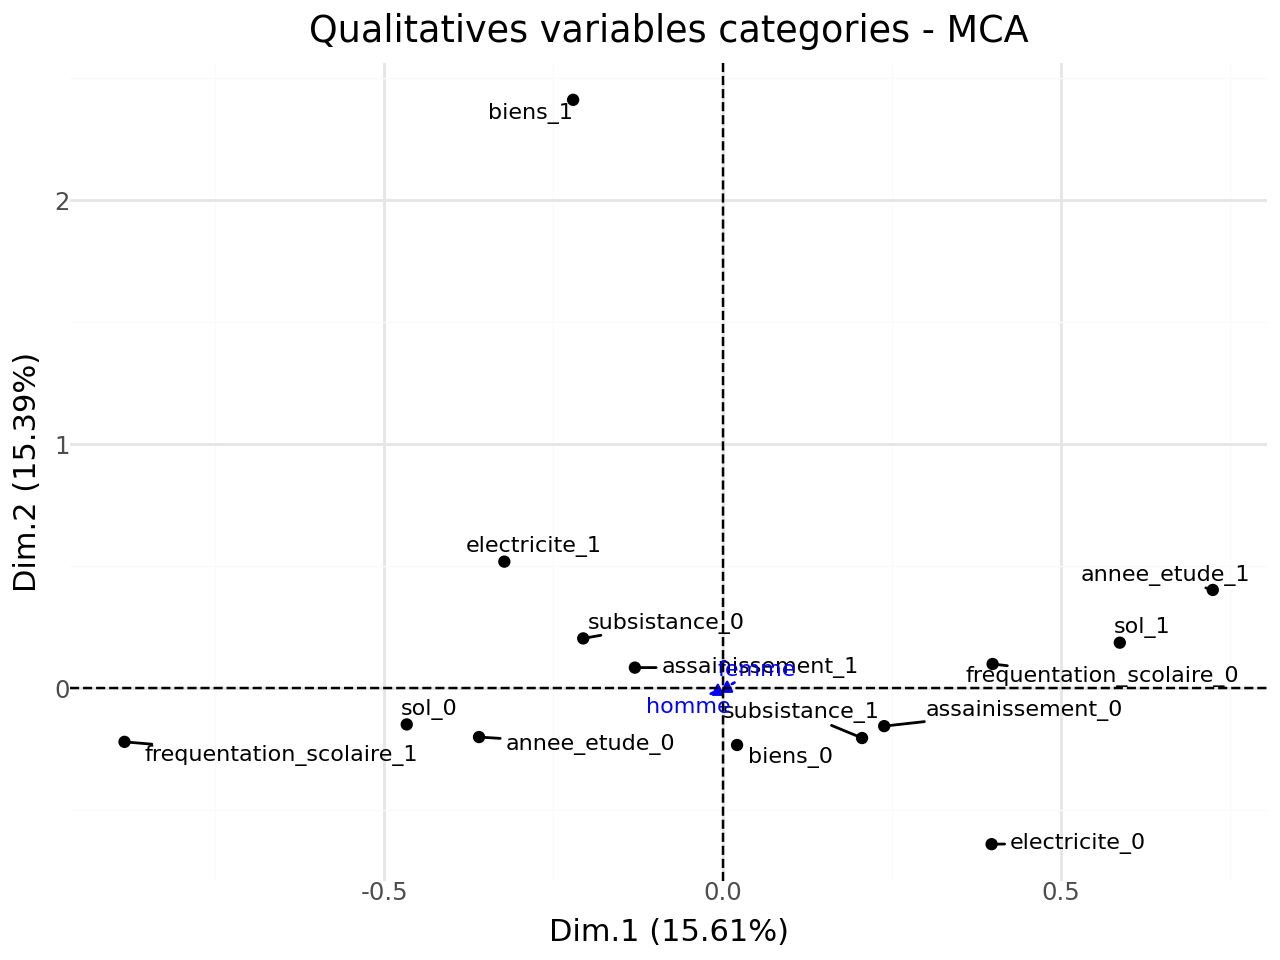

In [33]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(res_mca2,repel=True)
print(p)

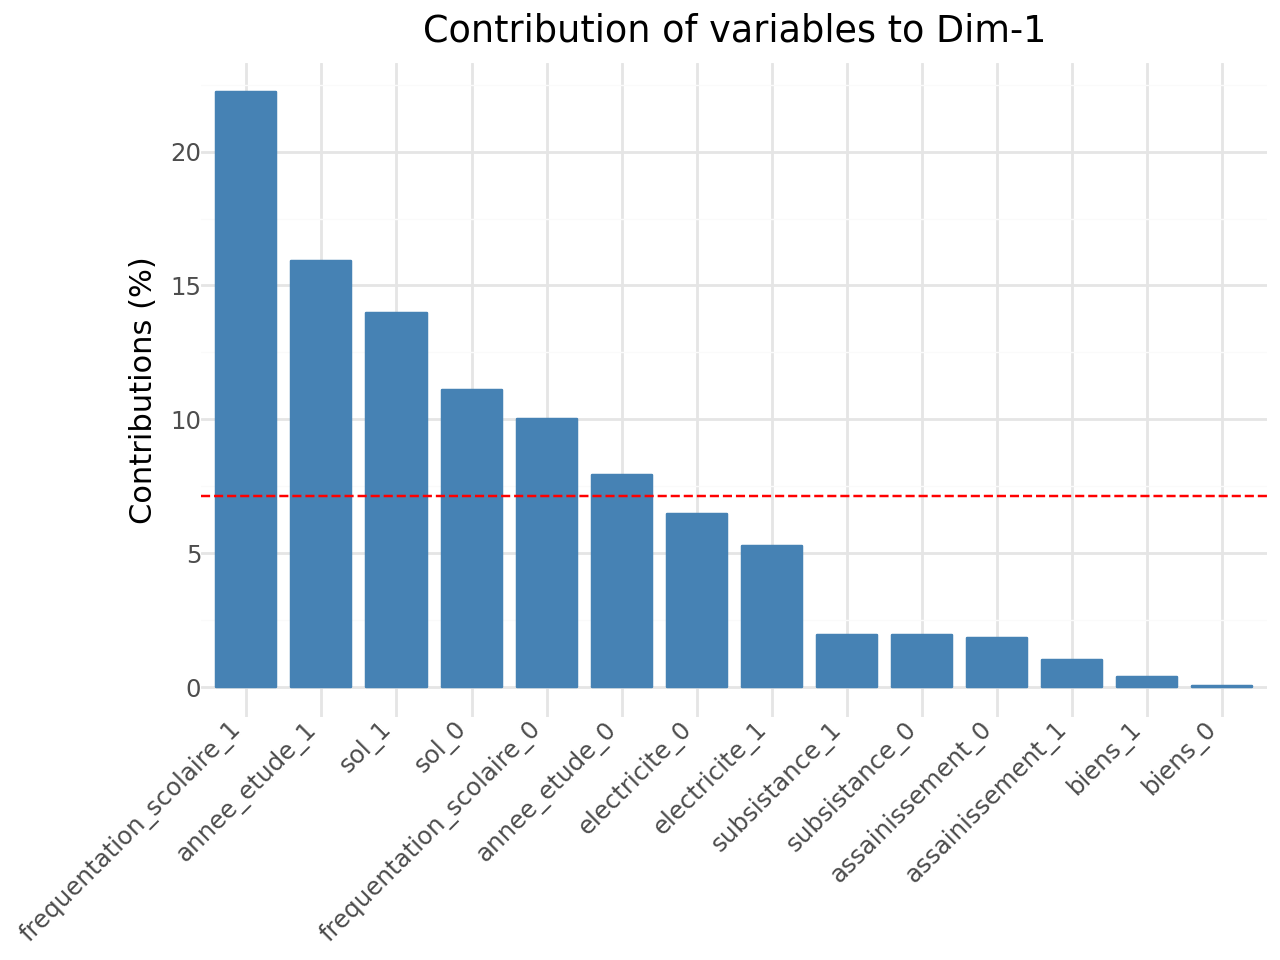

In [34]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mca2,choice="var")
print(p)

# On calcule $I_{i,1}$ le sous indicateur composite pour le ménage i par rapport à la dimension 1.

In [35]:
# Score des modalités sur le premier axe 
score = res_mca2.var_['coord']['Dim.1'].values
score = {'score':score}
score = pd.DataFrame(score)

# valeur propre associée au premier axe factoriel 
valeurs_propres = res_mca2.eig_["eigenvalue"]
lambda_1 = valeurs_propres[0]

# reformatage des données 
df4 = df[['annee_etude', 'frequentation_scolaire', 'subsistance', 'assainissement', 'electricite', 'sol', 'biens']]
df4 = df4.astype(object)
encoded_data = pd.get_dummies(df4, dtype=int)


# Calcule de la somme pondérée des indicateurs pour chaque observation
somme_ponderee = np.dot(encoded_data, score)

# Calcule la constante K
K = len(score)

# On divise la somme pondérée par K
ICP = somme_ponderee / K

# On normalise l'indicateur pour qu'il ne soit pas négatif et soit compris entre 0 et 1
ICP = (ICP - ICP.min()) / (ICP.max() - ICP.min())

# On inclut dans le DataFrame initial 
df['I_1'] = ICP

df['I_1'].describe()


count    1000.000000
mean        0.501565
std         0.211826
min         0.000000
25%         0.342012
50%         0.505343
75%         0.650566
max         1.000000
Name: I_1, dtype: float64

# On calcule $I_{i,2}$ le sous indicateur composite pour le ménage i par rapport à la dimension 2.

In [36]:
score2 = res_mca2.var_['coord']['Dim.2'].values
score2 = {'score2':score2}
score2 = pd.DataFrame(score2)

# valeur propre associée au deuxième axe factoriel 
valeurs_propres2 = res_mca2.eig_["eigenvalue"]
lambda_2 = valeurs_propres2[1]


df4 = df[['annee_etude', 'frequentation_scolaire', 'subsistance', 'assainissement', 'electricite', 'sol', 'biens']]
df4 = df4.astype(object)
encoded_data = pd.get_dummies(df4, dtype=int)


# Calcule de la somme pondérée des indicateurs pour chaque observation
somme_ponderee2 = np.dot(encoded_data, score2)


# Calcule la constante K
K = len(score2)

# On divise la somme pondérée par K


# On normalise pour qu'il ne soit pas négatif 
ICP = somme_ponderee2 / K
ICP = (ICP - ICP.min()) / (ICP.max() - ICP.min())

# On inclut dans le DataFrame initial 
df['I_2'] = ICP
df['I_2'].describe()

count    1000.000000
mean        0.315367
std         0.188861
min         0.000000
25%         0.172264
50%         0.300819
75%         0.389064
max         1.000000
Name: I_2, dtype: float64

# Calcul de l'indice synthétique de pauvreté 

In [37]:
df['ISP'] = (lambda_1 / (lambda_1  + lambda_2))*df['I_1'] + (lambda_2 / (lambda_1  + lambda_2))*df['I_2']

In [38]:
df['ISP'].head(10)

0    0.638767
1    0.455412
2    0.496450
3    0.338257
4    0.470174
5    0.333579
6    0.333579
7    0.465496
8    0.612963
9    0.308416
Name: ISP, dtype: float64

In [39]:
descrip_stats = df['ISP'].describe()
descrip_stats.to_excel('descrip_stats.xlsx', index=True, header=True)

# Catégorisation en classes 

Non pauvres : de 0 à 35%

Pauvres     : de 65% à 100%

In [40]:
bins = [0, 0.25, 0.40, 100]  # Bornes des intervalles
labels = ['1', '2', '3']  # Labels correspondants
df['class_poor'] = pd.cut(df['ISP'], bins=bins, labels=labels, right=False)
df['class_poor'].value_counts()*100/len(df['class_poor'])

class_poor
3    51.5
2    36.7
1    11.8
Name: count, dtype: float64

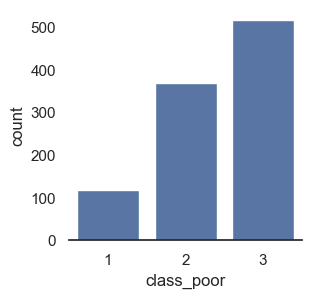

In [41]:
sns.set_theme(style="white")
plt.figure(figsize=(3,3))
sns.countplot(data=df,x=df['class_poor'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

# Cartographie des indicateurs 

In [42]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Charger le shapefile du Sénégal
shapefile_path = 'C:/Users/Julien/Desktop/JULIEN/DMCI/features-main/docs/map_senegal_shp/Limite_R‚gion.shp'
senegal = gpd.read_file(shapefile_path)
senegal.head(10)

,NOMREG,Hop,CS,PS,Population,Paludisme,Deces,Superficie,Densite,Ratio_PS,geometry
0,DAKAR,12,21,164,4042225,16581,71,547,7390,24648,"POLYGON ((271869.969 1633547.625, 272124 16329..."
1,DIOURBEL,2,6,111,1980821,34762,29,4826,410,17845,"POLYGON ((413687.688 1656282.5, 413730.406 165..."
2,FATICK,1,7,89,932629,1388,6,6851,136,10479,"POLYGON ((426214.531 1624200.875, 426379.688 1..."
3,KAOLACK,1,3,28,1267014,13409,14,5360,236,45251,"POLYGON ((425441.313 1589680.75, 425504.312 15..."
4,KEDOUGOU,1,4,90,203723,105694,40,16884,12,2264,"POLYGON ((798841.875 1489756.25, 798989.875 14..."
5,KOLDA,1,3,69,875660,181999,71,13780,64,12691,"POLYGON ((511263.812 1486623.375, 511386.094 1..."
6,LOUGA,2,8,76,1121619,2080,5,24905,45,14758,"POLYGON ((442211.406 1758013.25, 444138.25 175..."
7,MATAM,1,4,75,789219,5473,5,29452,27,10523,"POLYGON ((663436.5 1783939, 663338.938 1783771..."
8,SAINT LOUIS,3,5,107,1150062,10001,10,19253,60,10748,"POLYGON ((506636.625 1838970.625, 506851.312 1..."
9,SEDHIOU,1,3,43,612649,17668,27,7346,83,14248,"POLYGON ((446920.188 1480742.25, 447134.188 14..."


In [39]:
senegal.shape

(14, 11)

In [44]:
senegal = senegal.rename(columns={'NOMREG': 'region'})
df = df.rename(columns={'Region': 'region'})

# Cartographie de l'indicateur de la pauvreté multidimensionnel 

In [45]:
# Tabulation
crois_tab = pd.crosstab(df.region, df.poor, margins = True, normalize="index")*100
poverty_percentages = crois_tab[1].drop('All')

# Creation du DataFrame
poor_df = pd.DataFrame({
    'region': poverty_percentages.index,
    'taux_pauvrete': poverty_percentages.values
})

# DataFrame avec les taux de pauvreté
print(poor_df)

         region  taux_pauvrete
0         DAKAR      52.702703
1      DIOURBEL      60.655738
2        FATICK      62.318841
3      KAFFRINE      56.410256
4       KAOLACK      59.701493
5      KEDOUGOU      64.062500
6         KOLDA      65.789474
7         LOUGA      74.324324
8         MATAM      67.105263
9   SAINT LOUIS      63.513514
10      SEDHIOU      52.564103
11  TAMBACOUNDA      58.571429
12        THIES      61.971831
13   ZIGUINCHOR      54.411765


In [46]:
senegal = senegal.sort_values(by=['region'])
poor_df = poor_df.sort_values(by=['region'])

In [47]:
# Fusion les données de pauvreté avec le shapefile
senegal = senegal.merge(poor_df, on='region')

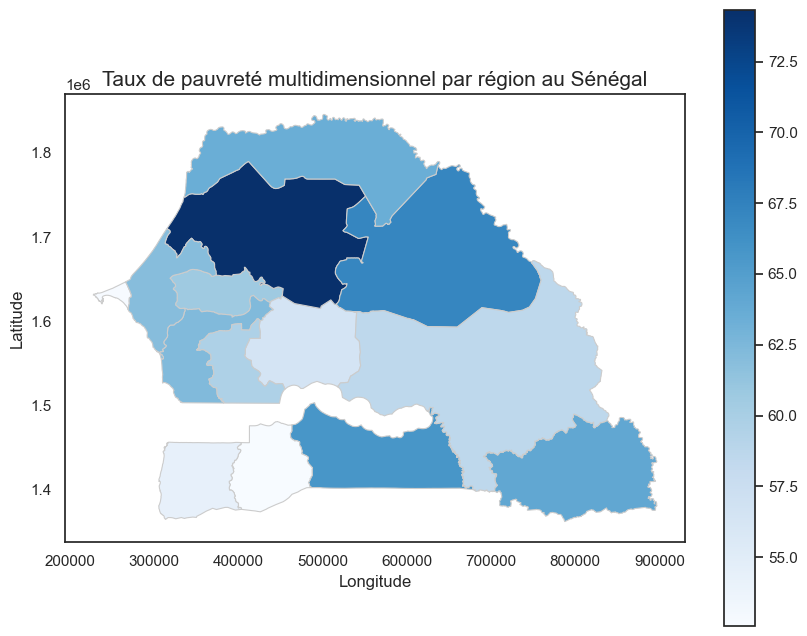

In [48]:
# Merging
senegal = senegal.merge(poor_df, on='region')

# Création de la carte
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
senegal.plot(column='taux_pauvrete_x', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Ajout des titres et des labels
ax.set_title('Taux de pauvreté multidimensionnel par région au Sénégal', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# Afficher la carte
plt.show()


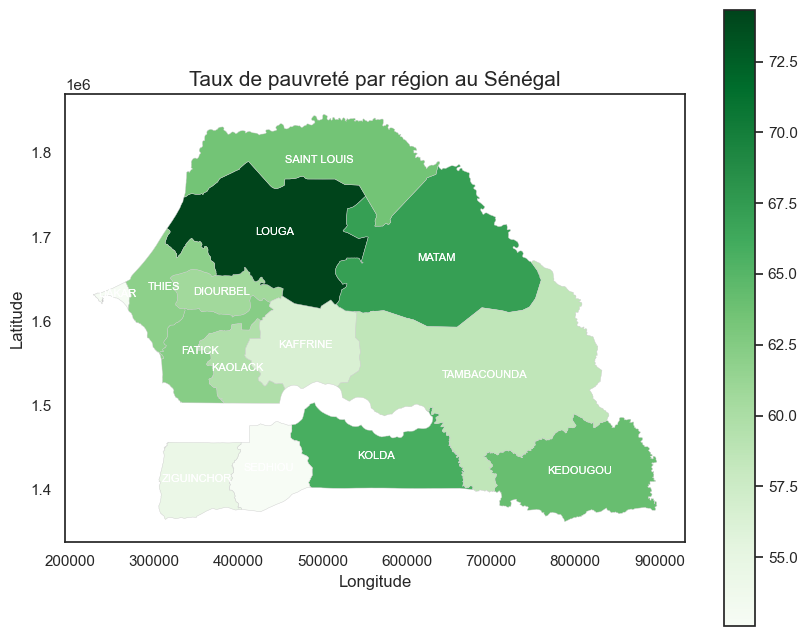

In [49]:
# avec une palette de couleurs bleue
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
senegal.plot(column='taux_pauvrete_x', cmap='Greens', linewidth=0.3, ax=ax, edgecolor='0.8', legend=True)

# Ajout des noms des régions à l'intérieur de la carte
for idx, row in senegal.iterrows():
    # Calculer du centre de chaque région
    centroid = row['geometry'].centroid
    # Annotation du nom de la région
    ax.annotate(text=row['region'], xy=(centroid.x, centroid.y), color='white',
                fontsize=8, ha='center', va='center')

# Ajout des titres et des labels
ax.set_title('Taux de pauvreté par région au Sénégal', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for idx, row in senegal.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['region'], xy=(centroid.x, centroid.y), color='white',
                fontsize=8, ha='center', va='center')

plt.show()


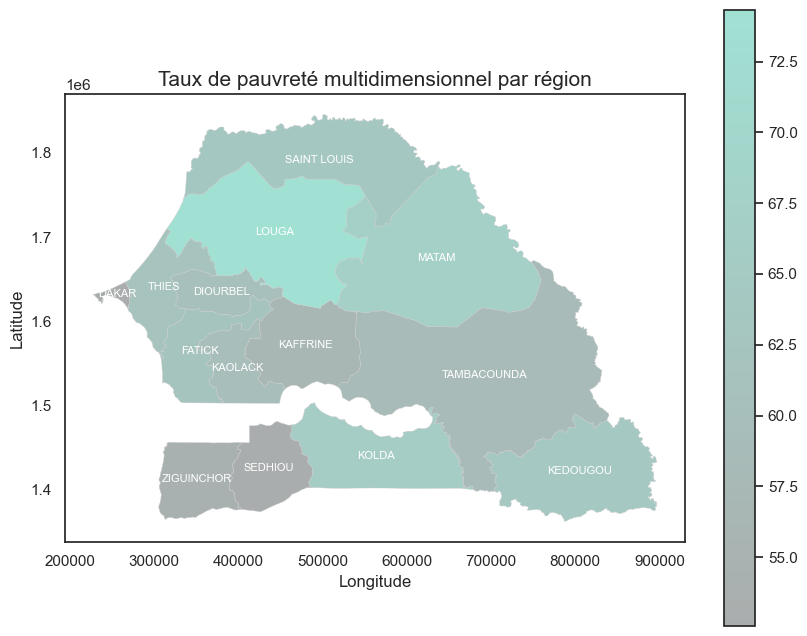

In [50]:
from matplotlib.colors import LinearSegmentedColormap

# Définir la couleur JungleMist
jungle_mist = LinearSegmentedColormap.from_list('JungleMist', ['#AAADAD', '#A1E1D4'])

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
senegal.plot(column='taux_pauvrete_x', cmap=jungle_mist, linewidth=0.3, ax=ax, edgecolor='0.8', legend=True)

# Ajout des noms des régions à l'intérieur de la carte
for idx, row in senegal.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(text=row['region'], xy=(centroid.x, centroid.y), color='white',
                fontsize=8, ha='center', va='center')

# Ajout des titres et des labels
ax.set_title('Taux de pauvreté multidimensionnel par région', fontdict={'fontsize': '15', 'fontweight': '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

chemin_fichier_pdf = 'carte1.pdf'
plt.savefig(chemin_fichier_pdf, bbox_inches='tight')


plt.show()




# Cartographie de l'indicateur de la pauvreté subjective


In [51]:
crois_tab2 = pd.crosstab(df.region, df.class_poor, margins = True, normalize="index")*100
crois_tab2

class_poor,1,2,3
region,,,
DAKAR,8.108108,33.783784,58.108108
DIOURBEL,11.475410,42.622951,45.901639
FATICK,11.594203,42.028986,46.376812
KAFFRINE,6.410256,29.487179,64.102564
KAOLACK,16.417910,35.820896,47.761194
KEDOUGOU,17.187500,34.375000,48.437500
KOLDA,13.157895,39.473684,47.368421
LOUGA,10.810811,35.135135,54.054054
MATAM,6.578947,38.157895,55.263158


In [52]:
import pandas as pd

# Supposons que vous ayez déjà votre DataFrame df
# Création de la table croisée
crois_tab2 = pd.crosstab(df.region, df.class_poor, margins=True, normalize="index")*100

# Récupération des trois colonnes et de la colonne 'region'
crois_tab2.reset_index(inplace=True)

# Renommage des colonnes pour une meilleure compréhension
crois_tab2.columns = ['region', 'non_pauvres', 'vulnerables', 'pauvres_isp']

# Filtrage pour ne garder que les colonnes souhaitées
result_df = crois_tab2[['region', 'non_pauvres', 'vulnerables', 'pauvres_isp']]

result_df = result_df[result_df['region'] != 'All']

print(result_df)


         region  non_pauvres  vulnerables  pauvres_isp
0         DAKAR     8.108108    33.783784    58.108108
1      DIOURBEL    11.475410    42.622951    45.901639
2        FATICK    11.594203    42.028986    46.376812
3      KAFFRINE     6.410256    29.487179    64.102564
4       KAOLACK    16.417910    35.820896    47.761194
5      KEDOUGOU    17.187500    34.375000    48.437500
6         KOLDA    13.157895    39.473684    47.368421
7         LOUGA    10.810811    35.135135    54.054054
8         MATAM     6.578947    38.157895    55.263158
9   SAINT LOUIS    16.216216    17.567568    66.216216
10      SEDHIOU    14.102564    41.025641    44.871795
11  TAMBACOUNDA    12.857143    38.571429    48.571429
12        THIES    14.084507    42.253521    43.661972
13   ZIGUINCHOR     7.352941    45.588235    47.058824


In [53]:
# Fusion les données de pauvreté avec le shapefile
senegal = senegal.merge(result_df, on='region')

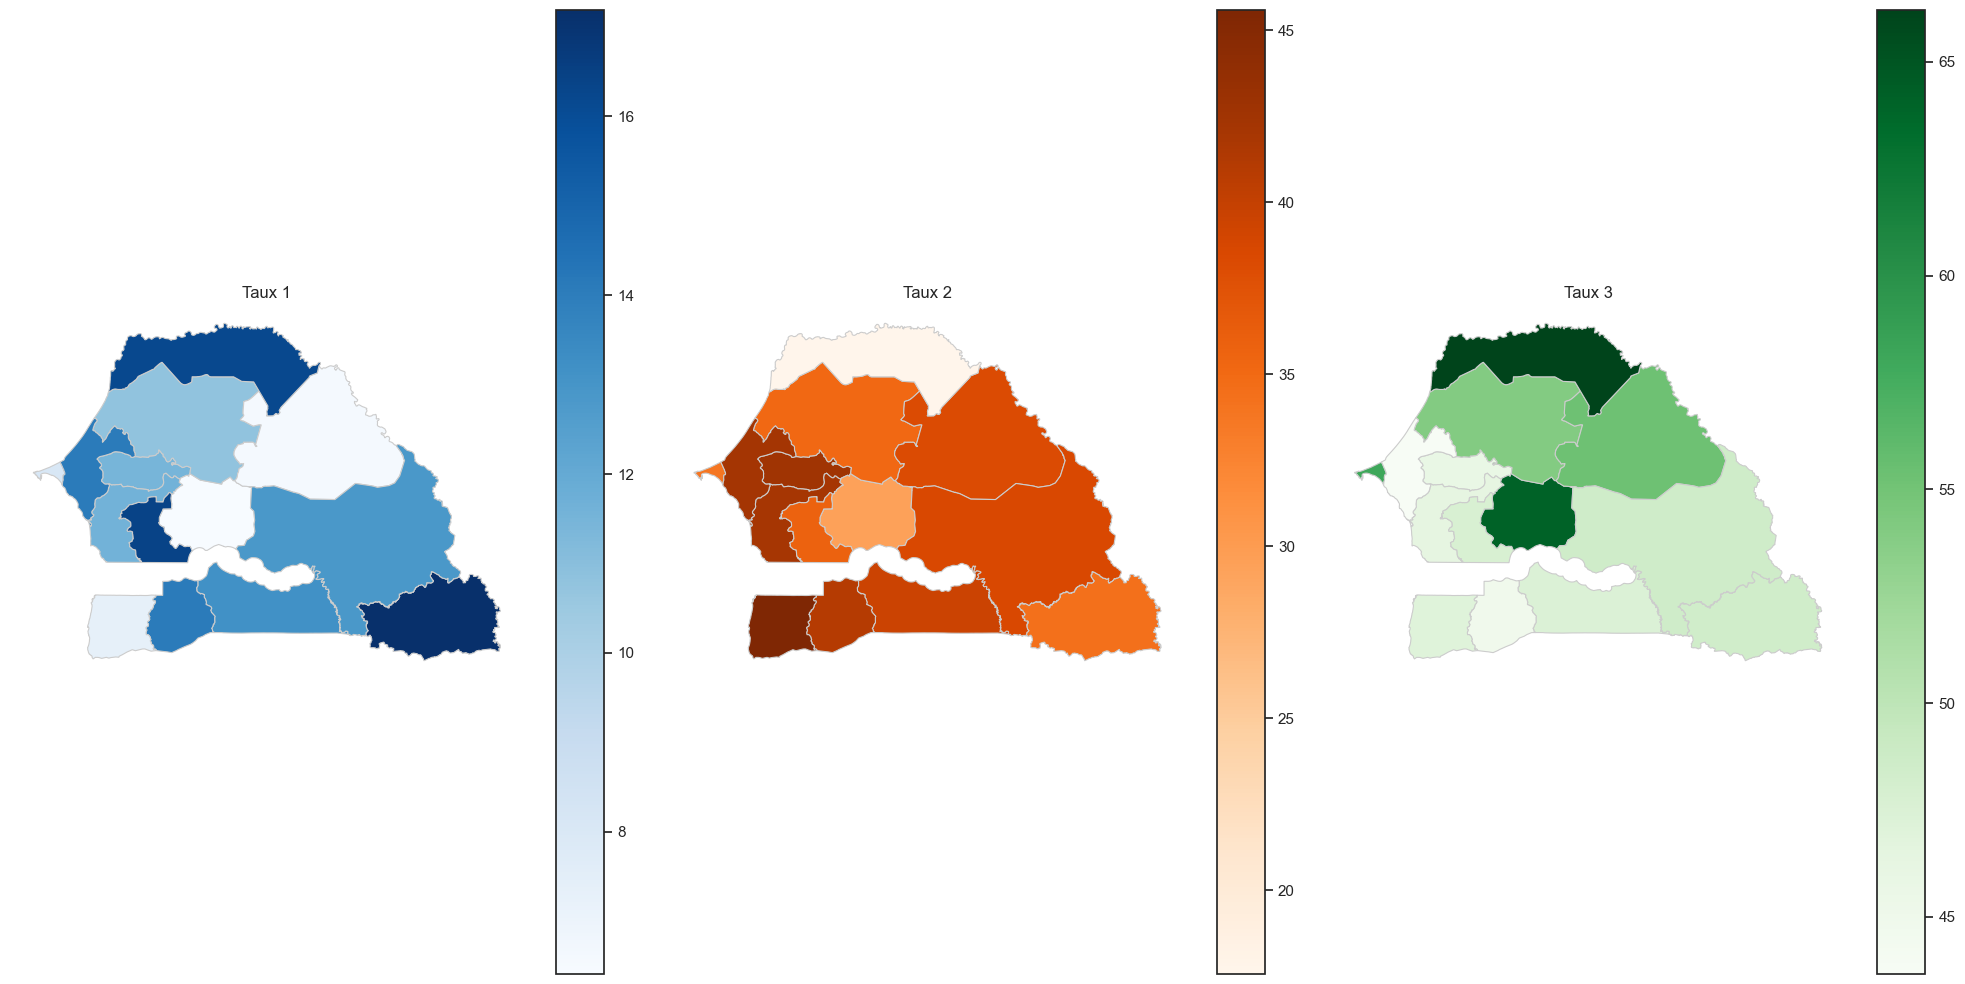

In [54]:
# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Affichage des différentes colonnes sur les sous-graphiques
senegal.plot(column='non_pauvres', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('Taux 1')

senegal.plot(column='vulnerables', cmap='Oranges', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('Taux 2')

senegal.plot(column='pauvres_isp', cmap='Greens', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('Taux 3')

# Réglages pour une meilleure apparence
for ax in axes:
    ax.set_axis_off()

plt.tight_layout()
plt.show()


# III Fusion avec la base de données des features 

In [55]:
df.head()

,Unnamed: 0,ID_CM,region,Sexe,Age_CM,Niveau_educ,Privation_eau,Privation_electricite,Privation_communication,Handicap_visuel,...,electricite_i,eau_i,sol_i,biens_i,score_poor,poor,I_1,I_2,ISP,class_poor
0,0,d65862c2b2c34aefb070a708718426b3,LOUGA,femme,43,4,1,1,1,0,...,0.055556,0.0,0.055556,0.0,0.277778,0,0.780754,0.494702,0.638767,3
1,1,5757c99a52d73d9b3e563a0046add2ee,KAFFRINE,homme,75,0,1,1,0,0,...,0.000000,0.0,0.055556,0.0,0.388889,1,0.671764,0.235893,0.455412,3
2,2,ed36b9182948943432386fa422a084b1,SEDHIOU,homme,72,0,1,0,0,0,...,0.055556,0.0,0.000000,0.0,0.611111,1,0.585144,0.406457,0.496450,3
3,3,bdc6d7893af482720b45eb6258f07fd3,FATICK,femme,67,3,1,1,1,1,...,0.055556,0.0,0.000000,0.0,0.444444,1,0.375155,0.300819,0.338257,2
4,4,fe090e5a588ca62bdbff8e807d04e475,KAFFRINE,homme,18,1,0,1,1,0,...,0.055556,0.0,0.055556,0.0,0.333333,1,0.579223,0.359530,0.470174,3


In [56]:
df_f = df[['ID_CM', 'region' , 'poor', 'ISP']]
f1 = pd.read_csv('features_mobiledata.csv')
f2 = pd.read_csv('features_recharges.csv')
f3 = pd.read_csv('features_cdr.csv')
f1.head()

,name,mobiledata_total_volume,mobiledata_mean_daily_volume,mobiledata_min_daily_volume,mobiledata_max_daily_volume,mobiledata_std_daily_volume,mobiledata_num_days
0,f0fc8c319a57646e6d49ce23752d3505,137.835968,137.835968,137.835968,137.835968,NaN,1
1,7e986304513b5aefb29f7132ff30ac71,0.000000,0.000000,0.000000,0.000000,NaN,1
2,f97029b921ed8301c38b510821af9dcd,116.561684,116.561684,116.561684,116.561684,NaN,1
3,65c669221b01166e3c13858f93a8d53f,0.000000,0.000000,0.000000,0.000000,NaN,1
4,ccc8d011a802124828038850982b1613,0.000000,0.000000,0.000000,0.000000,NaN,1


In [53]:
df_f

,ID_CM,region,poor,ISP
0,d65862c2b2c34aefb070a708718426b3,LOUGA,0,0.638767
1,5757c99a52d73d9b3e563a0046add2ee,KAFFRINE,1,0.455412
2,ed36b9182948943432386fa422a084b1,SEDHIOU,1,0.496450
3,bdc6d7893af482720b45eb6258f07fd3,FATICK,1,0.338257
4,fe090e5a588ca62bdbff8e807d04e475,KAFFRINE,1,0.470174
...,...,...,...,...
995,c1535a79902fc5ff91ad156fe0342f1d,SAINT LOUIS,1,0.643446
996,38fcc7ebd5b746b83e5e5e7fb0f5589c,SAINT LOUIS,1,0.465967
997,0131be0da8ff7feb2bfa4d8372bba9c3,KAFFRINE,1,0.485253
998,21d610b4701cd32b2967653dec13ac9a,KAFFRINE,0,0.333579


In [57]:
df_merge = pd.merge(df_f, f3, left_on='ID_CM', right_on='name', how='inner')
df_merge.shape

(498, 695)

In [58]:
data = df_merge.drop(['ID_CM', 'name', 'region'], axis=1)

In [59]:
f3.isnull().sum()

name                                  0
active_days_allweek_allday            0
active_days_allweek_day              23
active_days_allweek_night           187
active_days_weekday_allday            2
                                   ... 
frequent_antennas_weekday_day        33
frequent_antennas_weekday_night     205
frequent_antennas_weekend_allday    346
frequent_antennas_weekend_day       386
frequent_antennas_weekend_night     449
Length: 691, dtype: int64

In [60]:
100*data.isnull().mean()

poor                                 0.000000
ISP                                  0.000000
active_days_allweek_allday           0.000000
active_days_allweek_day              4.618474
active_days_allweek_night           37.550201
                                      ...    
frequent_antennas_weekday_day        6.626506
frequent_antennas_weekday_night     41.164659
frequent_antennas_weekend_allday    69.477912
frequent_antennas_weekend_day       77.510040
frequent_antennas_weekend_night     90.160643
Length: 692, dtype: float64

### On supprime les variables qui ont trp de valeurs manquantes et celui qui ont un pourcentage infiérieure à 10 on impute par les plus proches voisins

In [61]:
percentage = data.isnull().mean() * 100
colonnes_a_supp = percentage[percentage <= 10].index
data = data[colonnes_a_supp]

In [62]:
data.isna().mean().sum()

4.144578313253012

# Modèles de Machine learning pour l'IPM

In [63]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


In [64]:
X = data.drop(['poor', 'ISP'], axis=1)

y = data['poor']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
y.value_counts()

poor
1    304
0    194
Name: count, dtype: int64

In [66]:
# KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Imputation des fetures
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)
smote = SMOTE(random_state=0)
X_train, y_train = smote.fit_resample(X_train, y_train) # On entraine le modèle sur les données réechantillonnés 

# Regression logistique

In [67]:
logreg = LogisticRegression(
    solver='lbfgs',       
    l1_ratio=0.5,        
    max_iter=100)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.61      0.45      0.52       231
           1       0.56      0.71      0.63       231

    accuracy                           0.58       462
   macro avg       0.59      0.58      0.57       462
weighted avg       0.59      0.58      0.57       462



In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42        52
           1       0.57      0.53      0.55        73

    accuracy                           0.50       125
   macro avg       0.49      0.49      0.49       125
weighted avg       0.50      0.50      0.50       125



# Arbres de décision

In [69]:
#Imbalanced data

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44        52
           1       0.60      0.59      0.59        73

    accuracy                           0.53       125
   macro avg       0.52      0.52      0.52       125
weighted avg       0.53      0.53      0.53       125



# K plus proches voisins 

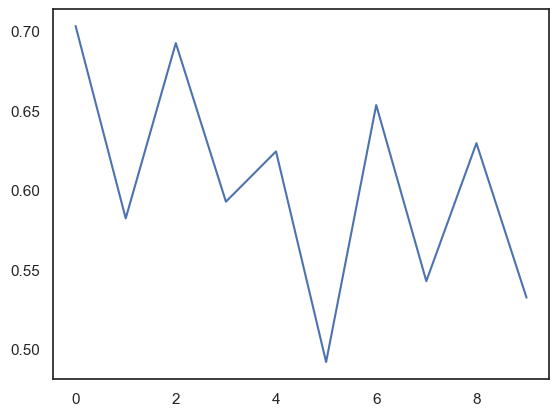

In [70]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

f1_list = []
for k in range(1, 11):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    f1_list.append(f1_score(y_test, y_pred))
    
plt.plot(f1_list);

In [75]:
neigh = KNeighborsClassifier(n_neighbors=1)

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.35      0.42        52
           1       0.63      0.79      0.70        73

    accuracy                           0.61       125
   macro avg       0.59      0.57      0.56       125
weighted avg       0.60      0.61      0.59       125



# Regression naive Bayesienne

In [76]:
bayes = GaussianNB()

bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.71      0.55        52
           1       0.64      0.37      0.47        73

    accuracy                           0.51       125
   macro avg       0.54      0.54      0.51       125
weighted avg       0.56      0.51      0.50       125



# Support vector Machine

In [77]:
svc = SVC()

svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.69      0.53        52
           1       0.60      0.33      0.42        73

    accuracy                           0.48       125
   macro avg       0.51      0.51      0.48       125
weighted avg       0.53      0.48      0.47       125



# La descente du gradient stochastique

In [157]:
sgd = SGDClassifier()

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        52
           1       0.58      1.00      0.74        73

    accuracy                           0.58       125
   macro avg       0.79      0.50      0.37       125
weighted avg       0.76      0.58      0.43       125



In [158]:
rf = RandomForestClassifier(
    n_estimators=10,      # nombre d'arbres dans la forêt
    random_state=0,        # pour reproductibilité
    #class_weight='balanced'  # pour gérer les données déséquilibrées
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.46      0.47        52
           1       0.62      0.63      0.63        73

    accuracy                           0.56       125
   macro avg       0.55      0.55      0.55       125
weighted avg       0.56      0.56      0.56       125



# Analyse dicriminante linéraire

In [159]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report

# Initialiser le modèle LDA
lda = LinearDiscriminantAnalysis()

# Entraîner le modèle sur les données d'entraînement
lda.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = lda.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.33      0.37      0.35        52
           1       0.51      0.48      0.50        73

    accuracy                           0.43       125
   macro avg       0.42      0.42      0.42       125
weighted avg       0.44      0.43      0.43       125



# Courbe de ROC des modèles 

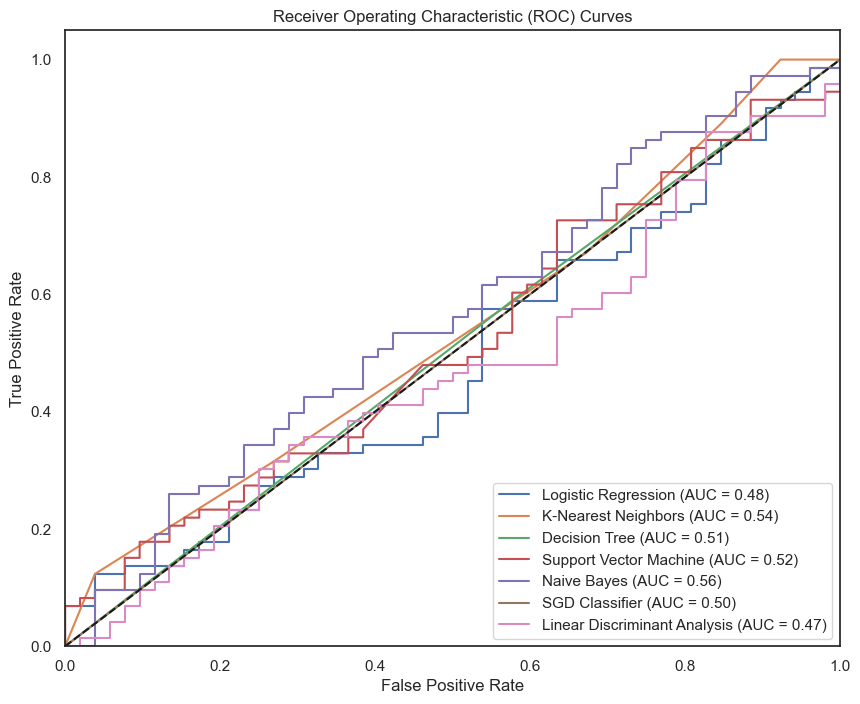

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', penalty='elasticnet', l1_ratio=0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(loss='log_loss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Tracer la courbe ROC pour chaque modèle
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

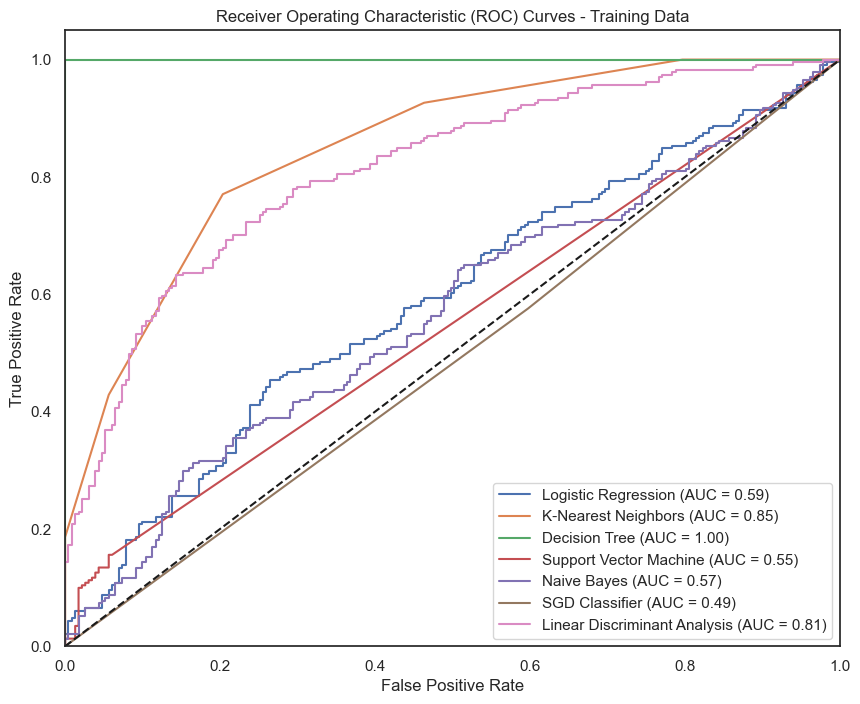

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', penalty='elasticnet', l1_ratio=0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(loss='log_loss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Tracer la courbe ROC pour chaque modèle sur les données d'entraînement
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_train)
    fpr, tpr, _ = roc_curve(y_train, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves - Training Data')
plt.legend(loc="lower right")
plt.show()


# Courbe d'apprentissage

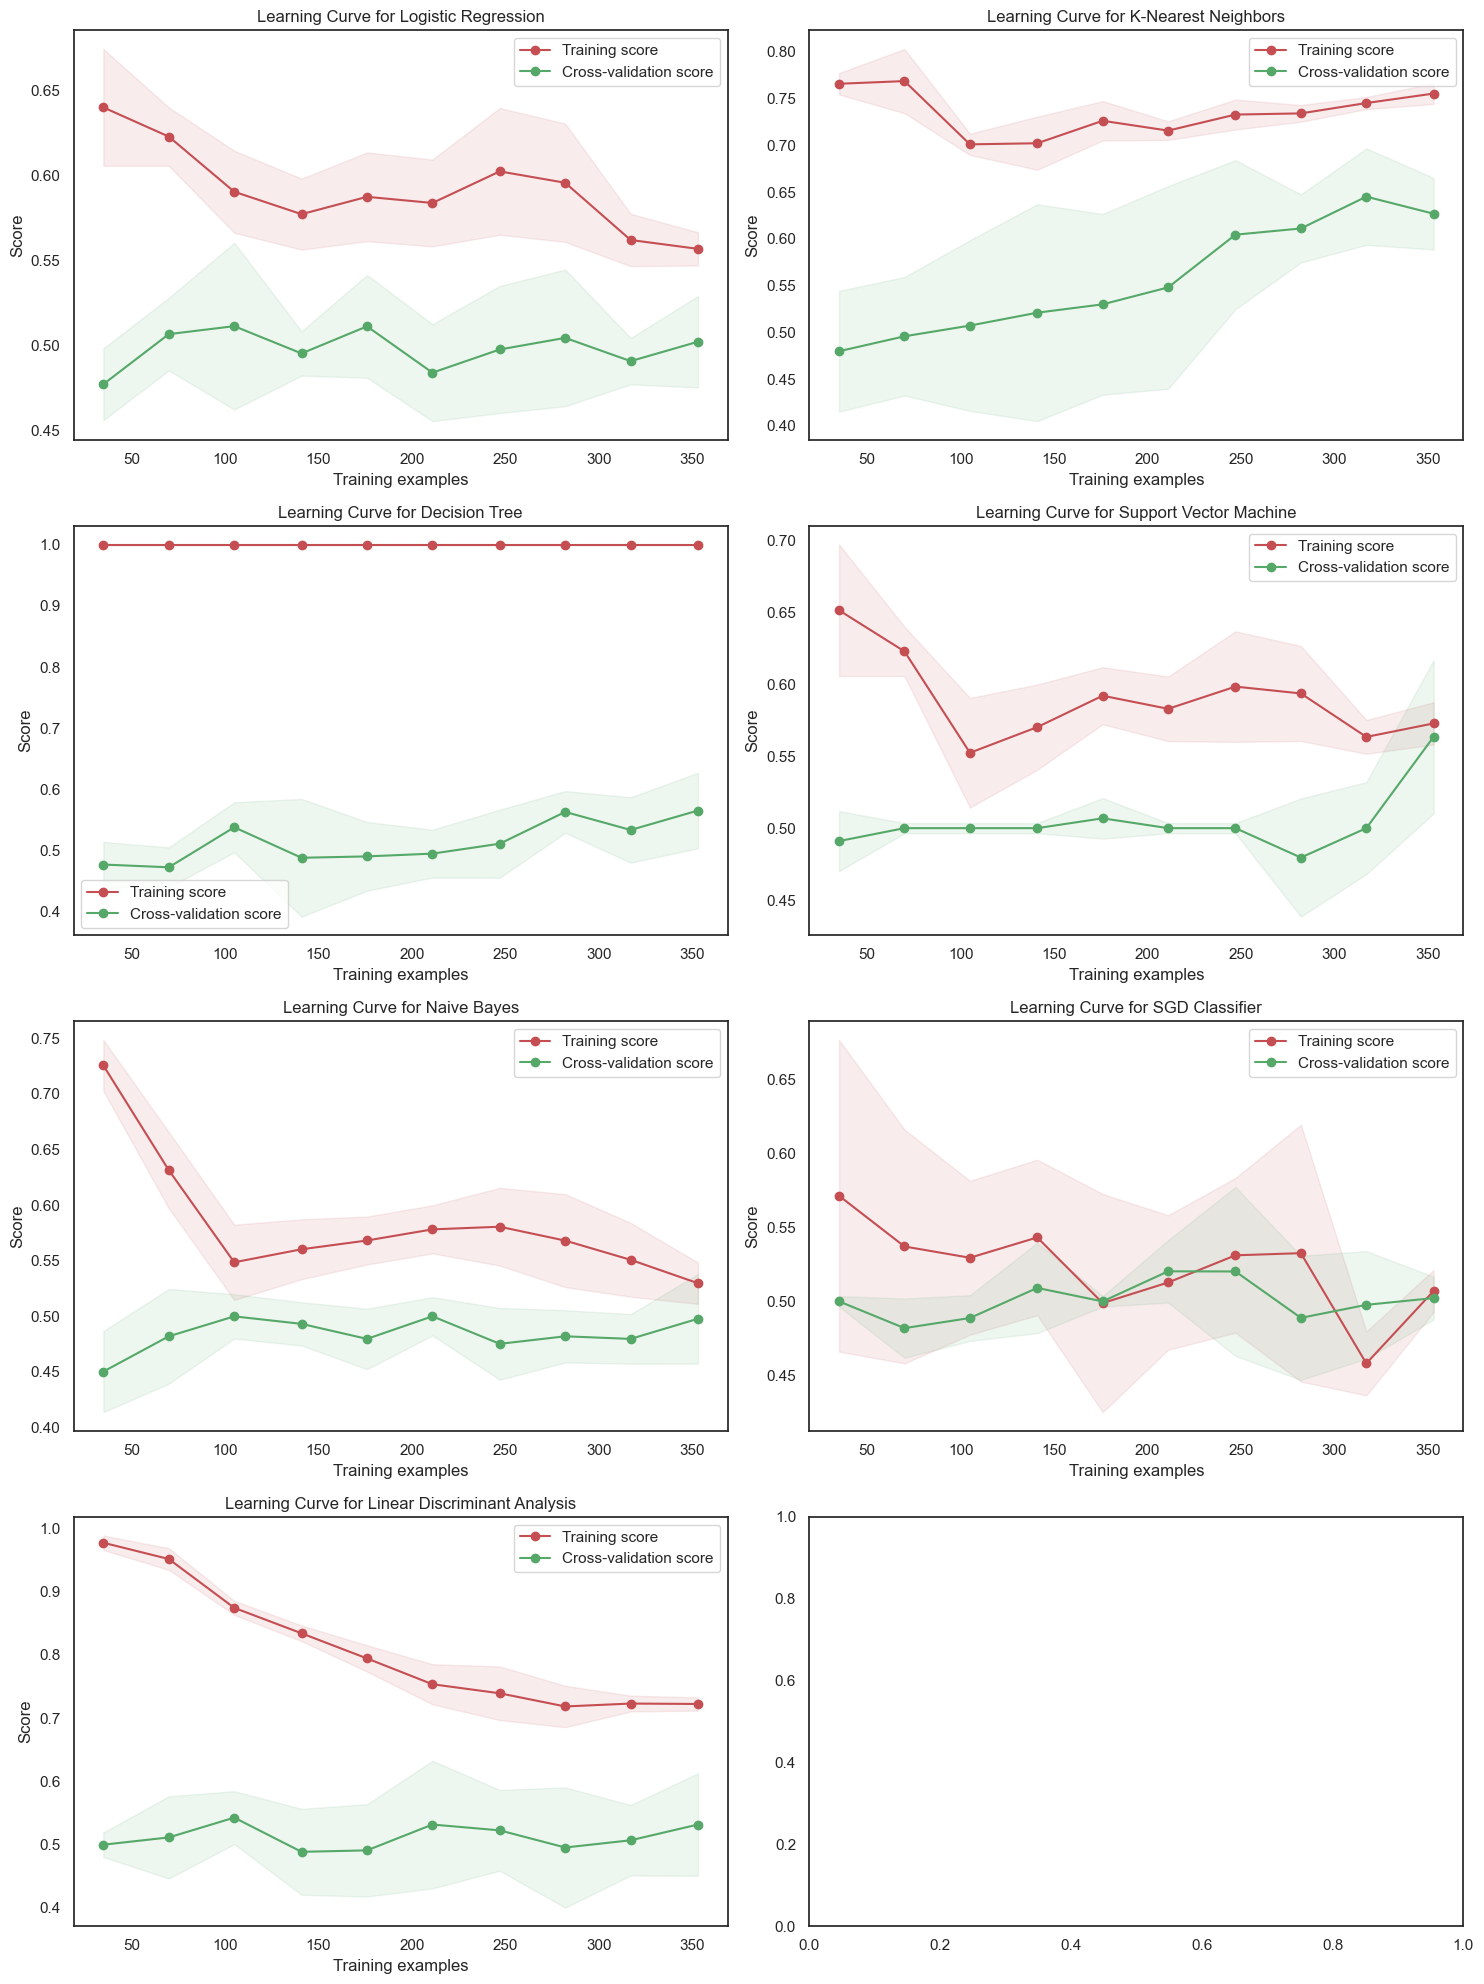

In [112]:
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt



# Liste des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='saga', penalty='elasticnet', l1_ratio=0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "SGD Classifier": SGDClassifier(loss='log_loss'),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis()
}

# Configuration de la grille des sous-graphes
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.ravel()

for i, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    axes[i].plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    axes[i].plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    axes[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    axes[i].set_title(f"Learning Curve for {name}")
    axes[i].set_xlabel("Training examples")
    axes[i].set_ylabel("Score")
    axes[i].legend(loc="best")

plt.tight_layout()
plt.show()

# Optimisation des hyper paramètres 

In [117]:
from sklearn.model_selection import GridSearchCV

# Définir les modèles et les paramètres à tester
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, solver='saga', penalty='elasticnet', l1_ratio=0.5),
        "params": {
            'solver': ['saga'],
            'penalty': ['elasticnet'],
            'l1_ratio': [0.1, 0.5, 0.9],
            'C': [0.01, 0.1, 1, 10]
        }
    },
    "K-Nearest Neighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(),
        "params": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30]
        }
    },
    "Naive Bayes": {
        "model": GaussianNB(),
        "params": {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    },
    "SGD Classifier": {
        "model": SGDClassifier(loss='log_loss'),
        "params": {
            'penalty': ['l2', 'l1', 'elasticnet'],
            'alpha': [0.0001, 0.001, 0.01],
            'max_iter': [1000, 2000, 3000]
        }
    },
    "Linear Discriminant Analysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {
            'solver': ['svd', 'lsqr', 'eigen'],
            'shrinkage': [None, 'auto']
        }
    }
}

# Fonction pour effectuer la recherche par grille
def perform_grid_search(model_dict, X_train, y_train):
    best_estimators = {}
    for model_name, model_info in model_dict.items():
        grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_estimators[model_name] = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best score for {model_name}: {grid_search.best_score_}\n")
    return best_estimators

# Appeler la fonction avec vos données d'entraînement
best_models = perform_grid_search(models, X_train, y_train)

# Prédiction et rapport de classification pour chaque modèle optimisé
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Best parameters for Logistic Regression: {'C': 0.01, 'l1_ratio': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
Best score for Logistic Regression: 0.5024004085801839

Best parameters for K-Nearest Neighbors: {'n_neighbors': 5, 'weights': 'distance'}
Best score for K-Nearest Neighbors: 0.6404239019407558

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 20}
Best score for Decision Tree: 0.5859805924412667

Best parameters for Naive Bayes: {'var_smoothing': 1e-07}
Best score for Naive Bayes: 0.5159346271705821

Best parameters for SGD Classifier: {'alpha': 0.01, 'max_iter': 3000, 'penalty': 'l1'}
Best score for SGD Classifier: 0.5384576098059244

Best parameters for Linear Discriminant Analysis: {'shrinkage': None, 'solver': 'svd'}
Best score for Linear Discriminant Analysis: 0.5341164453524004

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.29      0.62      0.40        42
           1 

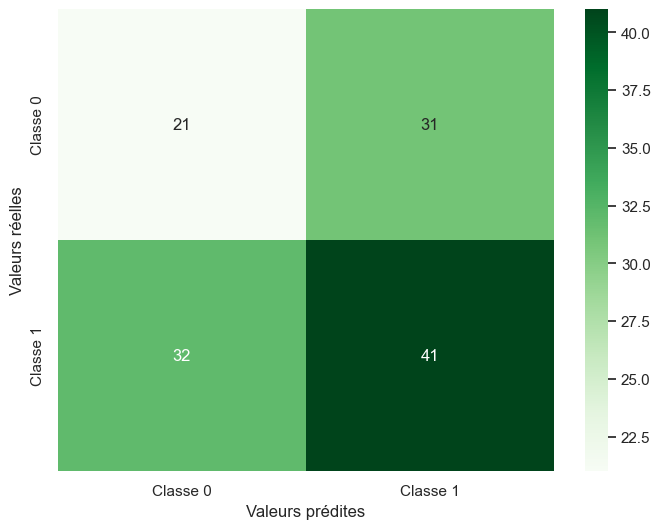

              precision    recall  f1-score   support

    Classe 0       0.40      0.40      0.40        52
    Classe 1       0.57      0.56      0.57        73

    accuracy                           0.50       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.50      0.50      0.50       125



In [164]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('')
plt.show()

# Affichage du rapport de classification
print(classification_report(y_test, y_pred, target_names=['Classe 0', 'Classe 1']))

In [ ]:
    "Support Vector Machine": {
        "model": SVC(probability=True),
        "params": {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    },